## **5 Inversion-Based Stle Transfer with Stable Diffusion**

## **Libraries and Dependencies**

Install the required libraries, including OpenAI-CLIP and Stable Diffusion dependencies

In [ ]:
!wget https://raw.githubusercontent.com/huggingface/diffusers/main/examples/textual_inversion/textual_inversion.py


--2024-12-17 00:02:45--  https://raw.githubusercontent.com/huggingface/diffusers/main/examples/textual_inversion/textual_inversion.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40555 (40K) [text/plain]
Saving to: ‘textual_inversion.py’

textual_inversion.p 100%[===================>]  39.60K  --.-KB/s    in 0.008s  

2024-12-17 00:02:45 (5.01 MB/s) - ‘textual_inversion.py’ saved [40555/40555]



In [ ]:
!pip install diffusers accelerate transformers torch ftfy scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y diffusers
!pip install git+https://github.com/huggingface/diffusers.git


Found existing installation: diffusers 0.31.0
Uninstalling diffusers-0.31.0:
  Successfully uninstalled diffusers-0.31.0
  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-0lecy20a
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-0lecy20a
  Resolved https://github.com/huggingface/diffusers.git to commit 7667cfcb41dfeb8f217e4314dcf2d561b8ca41d2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.32.0.dev0-py3-none-any.whl size=3182847 sha256=2987aa5d37b751b45aef6cdd2f300736e8ae022e489956a44a358e0b49e7a126
  Stored in directory: /tmp/pip-ephem-wheel-cache-t4zsxpvl/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers


In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import diffusers


In [ ]:
# Define paths
data_dir = "/content/drive/MyDrive/Pipeline_2/clustered_images_VanGogh/cluster_4"  # Original dataset path
output_dir = "/content/drive/MyDrive/Pipeline_2/clustered_images_VanGogh/data_B_preprocessed_subset"  # Directory for the subset

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# List all image files
image_files = [f for f in os.listdir(data_dir) if f.endswith((".jpg", ".png", ".jpeg"))]

# Randomly select 50 images
subset_files = random.sample(image_files, min(50, len(image_files)))  # Ensure <= 50 images are selected

# Resize and save the subset
for file in subset_files:
    img = Image.open(os.path.join(data_dir, file)).convert("RGB")
    img = img.resize((512, 512))  # Resize to 512x512
    img.save(os.path.join(output_dir, file))

print(f"Subset of {len(subset_files)} images resized and saved to:", output_dir)


Subset of 50 images resized and saved to: /content/drive/MyDrive/Pipeline_2/clustered_images_VanGogh/data_B_preprocessed_subset


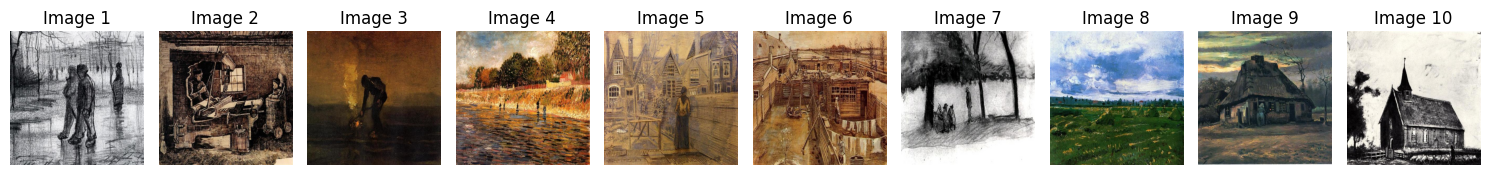

In [ ]:
# Display a few images for verification
num_display = min(10, len(subset_files))  # Number of images to display
fig, axes = plt.subplots(1, num_display, figsize=(15, 5))

for i, file in enumerate(subset_files[:num_display]):
    img = Image.open(os.path.join(output_dir, file))
    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()

In [ ]:
!accelerate launch textual_inversion.py \
  --pretrained_model_name_or_path="CompVis/stable-diffusion-v1-4" \
  --train_data_dir="/content/drive/MyDrive/Pipeline_2/clustered_images_VanGogh/data_B_preprocessed_subset" \
  --placeholder_token="<vangogh-style>" \
  --initializer_token="painting" \
  --resolution=512 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --learning_rate=5e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --max_train_steps=500 \
  --output_dir="/content/drive/MyDrive/Pipeline_2/textual_inversion_vangogh"


The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2024-12-17 00:06:11.614194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 00:06:11.631794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 00:06:11.637035: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alread

In [ ]:
from safetensors.torch import load_file

learned_embeddings = load_file("/content/drive/MyDrive/Pipeline_2/textual_inversion_vangogh/learned_embeds.safetensors")
print("Loaded Safetensors format:", learned_embeddings)


Loaded Safetensors format: {'<vangogh-style>': tensor([[ 2.0246e-03,  5.0540e-03,  6.2278e-03,  2.0964e-02,  2.7086e-02,
          5.5930e-03, -1.5627e-02,  7.9980e-03, -4.6939e-03, -2.1144e-02,
         -1.0997e-02,  2.2077e-02,  5.5137e-02,  2.6231e-02,  1.3975e-02,
         -1.5372e-02,  1.8529e-02, -9.6781e-03,  9.8345e-03, -1.0134e-02,
         -1.5141e-03, -2.2646e-02, -3.3220e-02, -1.6666e-02, -1.2870e-03,
         -3.1901e-03,  1.5344e-02, -8.4721e-04, -4.3270e-02,  9.6331e-03,
         -2.9339e-02,  2.5254e-02, -5.8447e-03, -9.9782e-03, -1.4451e-03,
          3.7264e-02,  5.8159e-03,  4.5587e-02, -3.3900e-02, -1.5504e-02,
         -1.5272e-02, -5.1441e-02,  2.0556e-02,  1.0151e-02, -5.9134e-03,
         -3.8904e-02, -1.6182e-02,  9.9442e-03,  8.6959e-03, -3.1613e-02,
          1.9553e-02, -9.6762e-03, -3.1689e-02,  1.4832e-02, -3.0124e-02,
          1.3693e-02,  2.3673e-02, -1.0252e-02, -2.9232e-02,  1.5915e-02,
         -3.0382e-02, -2.4751e-03, -8.1674e-03,  2.8095e-02,  1.3

In [ ]:
import torch
from safetensors.torch import load_file

# Load safetensors file
learned_embeddings = load_file("/content/drive/MyDrive/Pipeline_2/textual_inversion_vangogh/learned_embeds.safetensors")

# Save as .bin format
torch.save(learned_embeddings, "/content/drive/MyDrive/Pipeline_2/textual_inversion_vangogh/learned_embeds.bin")
print("Converted safetensors to .bin format.")


Converted safetensors to .bin format.


In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load Stable Diffusion pipeline
pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to("cuda")

# Load the learned embedding
pipeline.load_textual_inversion("/content/drive/MyDrive/Pipeline_2/textual_inversion_vangogh/learned_embeds.bin")

# Generate an image using the learned token
prompt = "a landscape painting in the style of <vangogh-style>"
image = pipeline(prompt=prompt, guidance_scale=7.5).images[0]

# Save the output
image.save("vangogh_style_landscape.png")
print("Image saved as 'vangogh_style_landscape.png'")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as 'vangogh_style_landscape.png'
